<a href="https://colab.research.google.com/github/juii18/Project--Movie-Recommendation-System/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


Step 2: Load Dataset

In [13]:
movies = {
    "title": [
        "Inception",
        "Interstellar",
        "The Dark Knight",
        "The Matrix",
        "Avengers",
        "Titanic"
    ],
    "description": [
        "dream world subconscious mind thriller sci fi",
        "space travel time relativity science fiction sci fi",
        "batman crime joker dark action thriller",
        "virtual reality artificial intelligence sci fi future",
        "superheroes action marvel sci fi fantasy",
        "romance love ship ocean tragedy"
    ]
}

df = pd.DataFrame(movies)


Step 3: Convert Text → Numbers (TF-IDF)

In [14]:
vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(df["description"])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


Step 4: Compute Similarity Between Movies

In [15]:
def movie_similarity_graph(movie_name):
    idx = df[df["title"] == movie_name].index[0]

    scores = cosine_sim[idx]
    sim_df = pd.DataFrame({
        "Movie": df["title"],
        "Similarity": scores
    })

    sim_df = sim_df[sim_df["Movie"] != movie_name]
    sim_df = sim_df.sort_values(by="Similarity", ascending=False)

    # Plot
    plt.figure(figsize=(8,5))
    plt.bar(sim_df["Movie"], sim_df["Similarity"])
    plt.ylim(0, 1)
    plt.xlabel("Movies")
    plt.ylabel("Cosine Similarity Score")
    plt.title(f"Movie Similarity Scores for '{movie_name}'")
    plt.xticks(rotation=45)
    plt.show()


Step 5: Test the Model

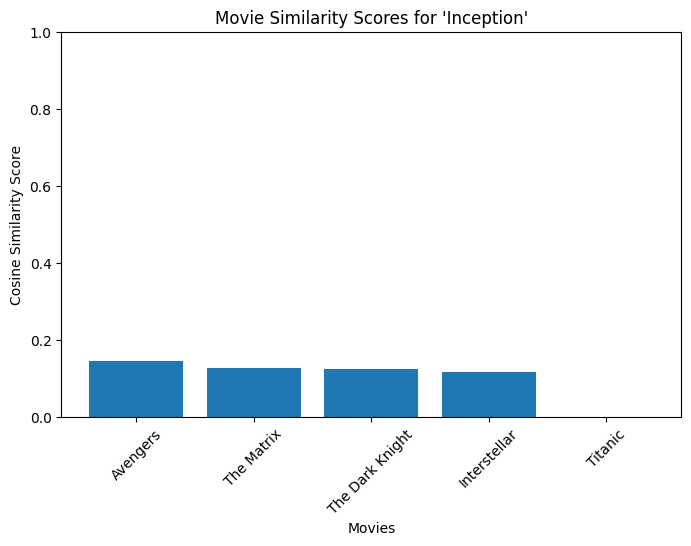

In [16]:
movie_similarity_graph("Inception")
